In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data0 = pd.read_csv('C:/Users/Varshitha/Downloads/Phishing-Website-Detection-by-Machine-Learning-Techniques-master/Phishing-Website-Detection-by-Machine-Learning-Techniques-master/DataFiles/urldata2.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,1,1,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,1,1,1,0,0,1,1,0


In [4]:
data0.shape

(20000, 17)

In [5]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         20000 non-null  object
 1   Have_IP        20000 non-null  int64 
 2   Have_At        20000 non-null  int64 
 3   URL_Length     20000 non-null  int64 
 4   URL_Depth      20000 non-null  int64 
 5   Redirection    20000 non-null  int64 
 6   https_Domain   20000 non-null  int64 
 7   TinyURL        20000 non-null  int64 
 8   Prefix/Suffix  20000 non-null  int64 
 9   DNS_Record     20000 non-null  int64 
 10  Domain_Age     20000 non-null  int64 
 11  Domain_End     20000 non-null  int64 
 12  iFrame         20000 non-null  int64 
 13  Mouse_Over     20000 non-null  int64 
 14  Right_Click    20000 non-null  int64 
 15  Web_Forwards   20000 non-null  int64 
 16  Label          20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


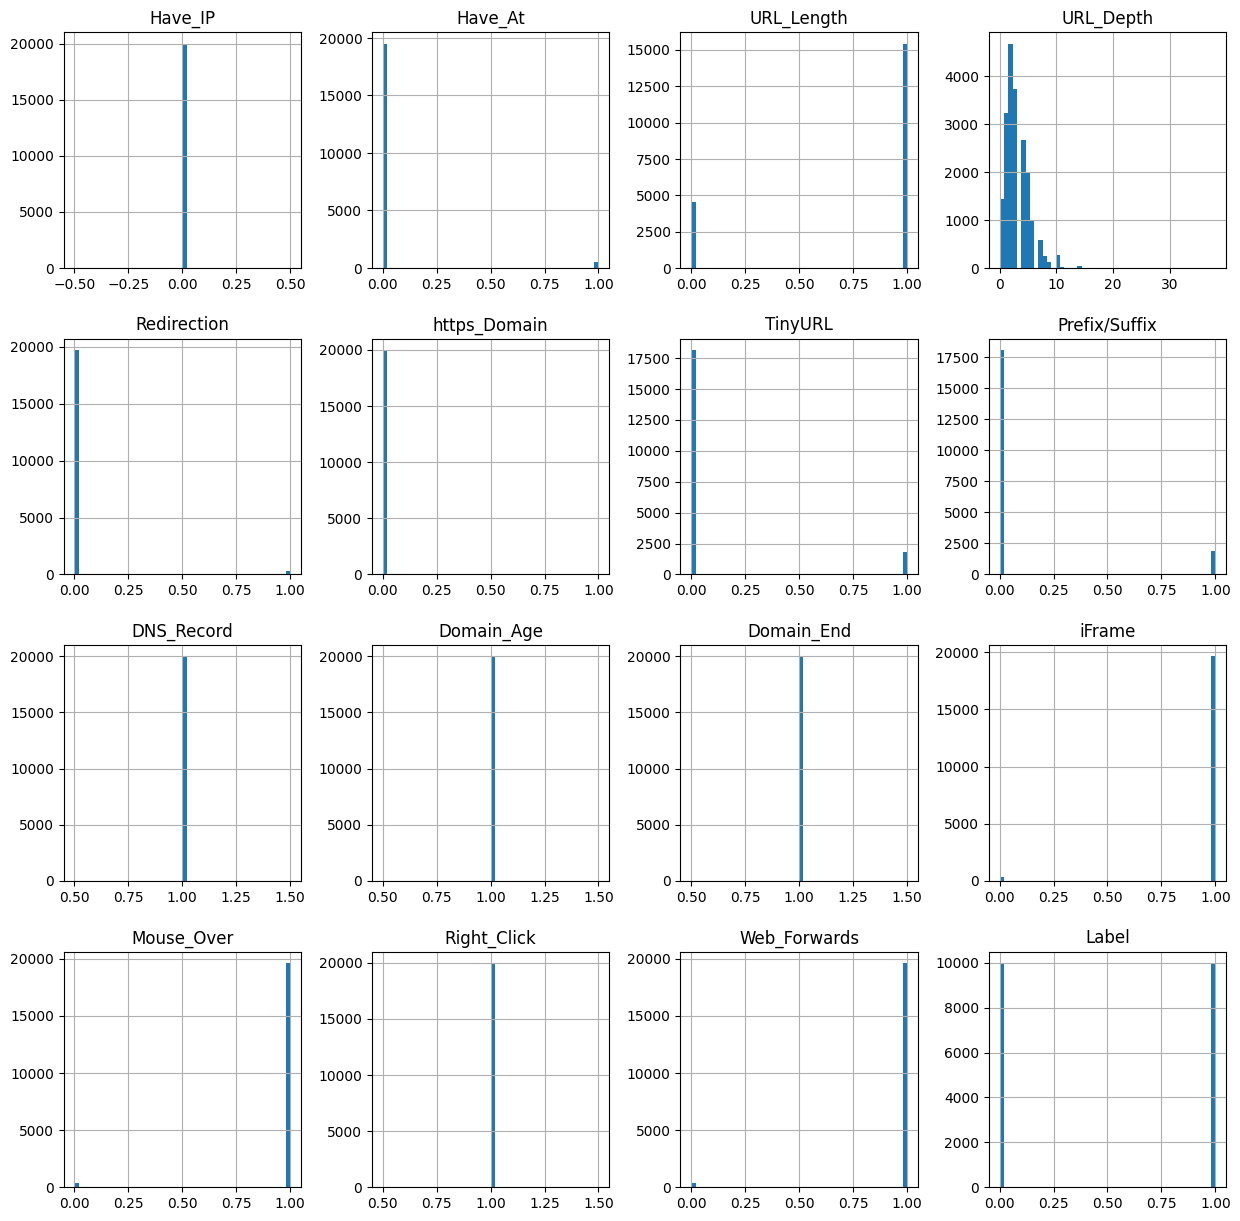

In [7]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [8]:
#Correlation heatmap

# plt.figure(figsize=(15,13))
# sns.heatmap(data0.corr())
# plt.show()

In [9]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,0.0,0.023950,0.772100,3.052850,0.013400,0.000200,0.092050,0.094800,1.0,1.0,1.0,0.981950,0.981850,1.0,0.982400,0.500000
std,0.0,0.152897,0.419488,2.138688,0.114983,0.014141,0.289104,0.292946,0.0,0.0,0.0,0.133136,0.133497,0.0,0.131496,0.500013
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,0.000000
50%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,0.500000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000
max,0.0,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000


In [10]:
data = data0.drop(['Domain'], axis = 1).copy()

In [11]:
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [12]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,2,0,0,0,1,1,1,1,1,1,1,1,1
1,0,0,1,3,0,0,0,1,1,1,1,1,1,1,1,1
2,0,0,1,2,0,0,0,0,1,1,1,1,1,1,1,1
3,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,0
4,0,0,1,4,0,0,0,0,1,1,1,1,1,1,1,0


In [13]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((20000, 15), (20000,))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((16000, 15), (4000, 15))

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [17]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 7)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [18]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [19]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.808
Decision Tree: Accuracy on test Data: 0.803


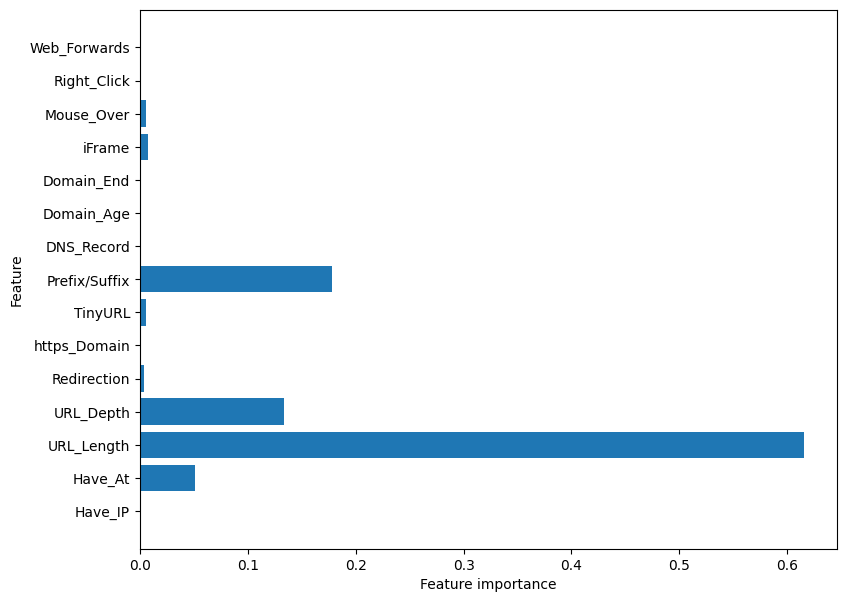

In [20]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [21]:
storeResults('DT', acc_train_tree, acc_test_tree)

In [22]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [23]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [24]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.793
Random forest: Accuracy on test Data: 0.793


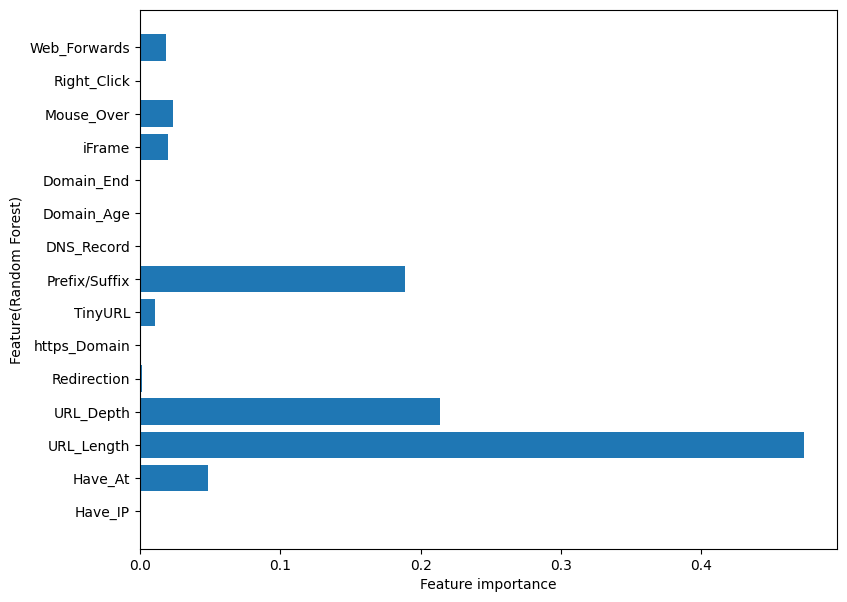

In [25]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature(Random Forest)")
plt.show()

In [26]:
storeResults('RF', acc_train_forest, acc_test_forest)

In [27]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [28]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [29]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.812
Multilayer Perceptrons: Accuracy on test Data: 0.808


In [30]:
storeResults('MLP', acc_train_mlp, acc_test_mlp)

In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [34]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.816
XGBoost : Accuracy on test Data: 0.812


In [35]:
storeResults('XGB', acc_train_xgb, acc_test_xgb)

In [36]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(xgb, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [37]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [38]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [39]:

acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.793
SVM : Accuracy on test Data: 0.792


In [40]:

storeResults('SVM', acc_train_svm, acc_test_svm)

In [41]:
!pip install lightgbm

In [42]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7960, number of negative: 8040
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier()

In [43]:
y_test_LGBM = clf.predict(X_test)
y_train_LGBM = clf.predict(X_train)

In [44]:

acc_train_lgbm = accuracy_score(y_train,y_train_LGBM)
acc_test_lgbm = accuracy_score(y_test,y_test_LGBM)

print("LGBM: Accuracy on training Data: {:.3f}".format(acc_train_lgbm))
print("LGBM: Accuracy on test Data: {:.3f}".format(acc_test_lgbm))

LGBM: Accuracy on training Data: 0.816
LGBM: Accuracy on test Data: 0.811


In [45]:
storeResults('LGBM', acc_train_lgbm, acc_test_lgbm)

In [46]:
!pip install catboost

In [47]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000,
                           task_type="GPU",
                           devices='0:1',learning_rate=0.4,max_depth=7)
model.fit(X_train, y_train)

0:	learn: 0.4510111	total: 96.2ms	remaining: 1m 36s
1:	learn: 0.4148210	total: 176ms	remaining: 1m 27s
2:	learn: 0.4028703	total: 258ms	remaining: 1m 25s
3:	learn: 0.3971440	total: 338ms	remaining: 1m 24s
4:	learn: 0.3924456	total: 418ms	remaining: 1m 23s
5:	learn: 0.3906561	total: 474ms	remaining: 1m 18s
6:	learn: 0.3899857	total: 549ms	remaining: 1m 17s
7:	learn: 0.3888133	total: 601ms	remaining: 1m 14s
8:	learn: 0.3878983	total: 666ms	remaining: 1m 13s
9:	learn: 0.3871285	total: 732ms	remaining: 1m 12s
10:	learn: 0.3870515	total: 775ms	remaining: 1m 9s
11:	learn: 0.3869763	total: 819ms	remaining: 1m 7s
12:	learn: 0.3869443	total: 860ms	remaining: 1m 5s
13:	learn: 0.3868375	total: 903ms	remaining: 1m 3s
14:	learn: 0.3868054	total: 947ms	remaining: 1m 2s
15:	learn: 0.3868053	total: 1s	remaining: 1m 1s
16:	learn: 0.3867898	total: 1.04s	remaining: 1m
17:	learn: 0.3865528	total: 1.1s	remaining: 1m
18:	learn: 0.3860901	total: 1.17s	remaining: 1m
19:	learn: 0.3860673	total: 1.21s	remaining

In [48]:
y_test_CB = model.predict(X_test)
y_train_CB = model.predict(X_train)

In [49]:
acc_train_cb = accuracy_score(y_train,y_train_CB)
acc_test_cb = accuracy_score(y_test,y_test_CB)

print("CB: Accuracy on training Data: {:.3f}".format(acc_train_cb))
print("CB: Accuracy on test Data: {:.3f}".format(acc_test_cb))

CB: Accuracy on training Data: 0.816
CB: Accuracy on test Data: 0.812


In [50]:
storeResults('CB', acc_train_cb, acc_test_cb)

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(X_train, y_train)


AdaBoostClassifier(random_state=1)

In [52]:
y_test_AB = ada_boost.predict(X_test)
y_train_AB = ada_boost.predict(X_train)

acc_train_ab = accuracy_score(y_train,y_train_AB)
acc_test_ab = accuracy_score(y_test,y_test_AB)

print("AB: Accuracy on training Data: {:.3f}".format(acc_train_ab))
print("AB: Accuracy on test Data: {:.3f}".format(acc_test_ab))

AB: Accuracy on training Data: 0.812
AB: Accuracy on test Data: 0.806


In [53]:
storeResults('AB', acc_train_ab, acc_test_ab)

In [54]:

results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,DT,0.808,0.803
1,RF,0.793,0.793
2,MLP,0.812,0.808
3,XGB,0.816,0.812
4,SVM,0.793,0.792
5,LGBM,0.816,0.811
6,CB,0.816,0.812
7,AB,0.812,0.806


In [55]:

results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGB,0.816,0.812
6,CB,0.816,0.812
5,LGBM,0.816,0.811
2,MLP,0.812,0.808
7,AB,0.812,0.806
0,DT,0.808,0.803
1,RF,0.793,0.793
4,SVM,0.793,0.792


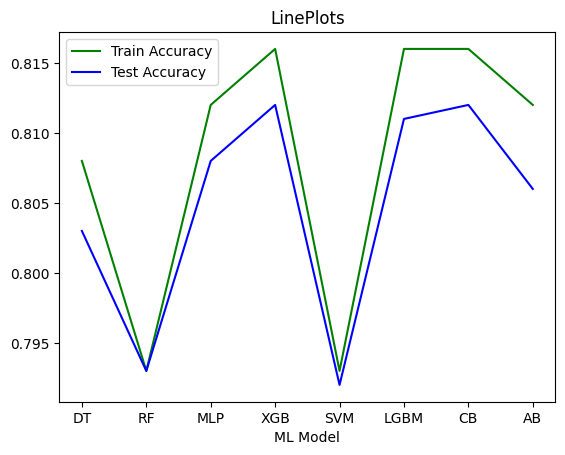

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.gca()
 
# line plot for math marks
results.plot(kind='line',
        x='ML Model',
        y='Train Accuracy',
        color='green', ax=ax)
 
# line plot for physics marks
results.plot(kind='line', x='ML Model',
        y='Test Accuracy',
        color='blue', ax=ax)
 

 
# set the title
plt.title('LinePlots')
fig=plt.figure()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
# show the plot
plt.show()

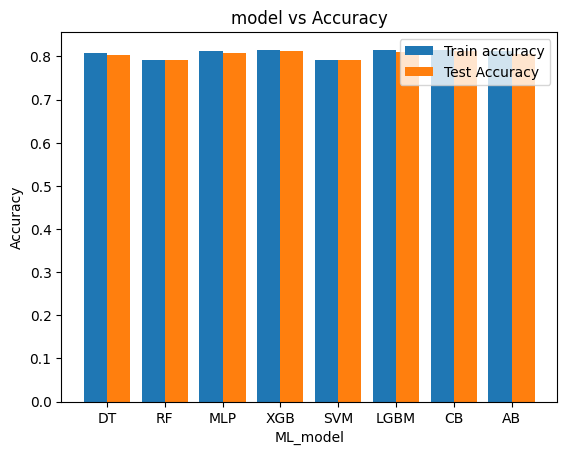

In [57]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ML_Model

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, acc_train, 0.4, label = 'Train accuracy')
plt.bar(X_axis + 0.2, acc_test, 0.4, label = 'Test Accuracy')
  
plt.xticks(X_axis, X)
plt.xlabel("ML_model")
plt.ylabel("Accuracy")
plt.title("model vs Accuracy")
plt.legend()
plt.show()

testing

In [58]:
import featureextraction

In [59]:
file = open(r"C:/Users/Varshitha/Downloads/Phishing-Website-Detection-by-Machine-Learning-Techniques-master/XGBoost.pkl","rb")
gbc = pickle.load(file)

In [60]:
data = r"https://www.rvce.edu.in/"
phish_features=[]
phish_features.append(featureextraction.featureExtraction(data))
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing = phishing.drop(['Domain'], axis = 1).copy()
prediction = gbc.predict(phishing)
print(prediction)

[1]


In [61]:
data = r"https://www.overleaf.com/project/62564d018c0d3e30ec3edb9d"
phish_features=[]
phish_features.append(featureextraction.featureExtraction(data))
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing = phishing.drop(['Domain'], axis = 1).copy()
prediction = gbc.predict(phishing)
print(prediction)

[0]


In [62]:
data = r"https://chat.openai.com/?model=text-davinci-002-render-sha"
phish_features=[]
phish_features.append(featureextraction.featureExtraction(data))
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing = phishing.drop(['Domain'], axis = 1).copy()
prediction = gbc.predict(phishing)
print(prediction)

[0]


In [63]:
data = r"https://www.iitb.ac.in/en/information-faculty"
phish_features=[]
phish_features.append(featureextraction.featureExtraction(data))
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing = phishing.drop(['Domain'], axis = 1).copy()
prediction = gbc.predict(phishing)
print(prediction)

[1]


In [64]:
data = r"https://www.onlinesbi.sbi/sbicollect/icollecthome.htm?corpID=843012"
phish_features=[]
phish_features.append(featureextraction.featureExtraction(data))
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing = phishing.drop(['Domain'], axis = 1).copy()
prediction = gbc.predict(phishing)
print(prediction)

[0]


In [66]:
data = r"https://mail.google.com/mail/u/0/#inbox/FMfcgzGrcXrRRcBNvRffpMDjcvVDTXWQ"
phish_features=[]
phish_features.append(featureextraction.featureExtraction(data))
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing = phishing.drop(['Domain'], axis = 1).copy()
prediction = gbc.predict(phishing)
print(prediction)

[0]


In [67]:
data = r"https://vvwconsorcio.com/"
phish_features=[]
phish_features.append(featureextraction.featureExtraction(data))
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing = phishing.drop(['Domain'], axis = 1).copy()
prediction = gbc.predict(phishing)
print(prediction)

[1]
